In [ ]:
import numpy as np
import random 
from matplotlib import pyplot as plt

In [ ]:
np.random.normal(loc=0, scale= 1)

-0.4133273858201734

In [ ]:
def gen_wiener(steps):
  s = [0]
  for i in range(steps):
    s.append(s[i]+np.random.normal())
  return np.array(s)*(1/np.sqrt(steps))

In [ ]:
test = gen_wiener(10)

In [ ]:
test

array([ 0.        , -0.07097036, -0.02392313,  0.38579079,  0.27712626,
        0.0346803 ,  0.54217407,  0.13351842,  0.71206378,  0.70946   ,
        0.89872267])

In [ ]:
test[-1]

0.007722967427979822

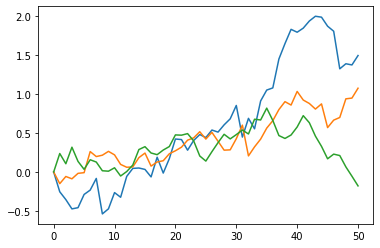

In [ ]:
plt.plot(gen_wiener(50))
plt.plot(gen_wiener(50))
plt.plot(gen_wiener(50))

In [ ]:
def gen_bridge(arry):
  time = np.arange(len(arry))*arry[-1]/(len(arry)-1)
  brown = arry - time
  return brown


In [ ]:
gen_bridge(test)

array([ 0.        , -0.16084263, -0.20366767,  0.11617399, -0.0823628 ,
       -0.41468104,  0.00294047, -0.49558744, -0.00691435, -0.0993904 ,
        0.        ])

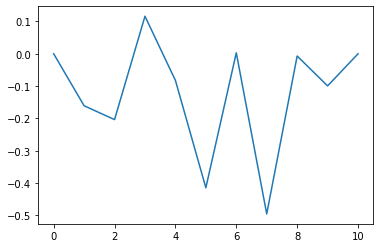

In [ ]:
plt.plot(gen_bridge(test))

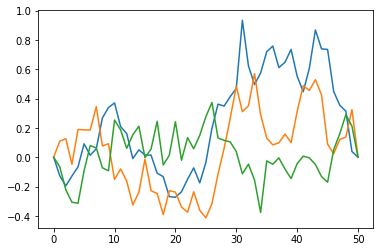

In [ ]:
plt.plot(gen_bridge(gen_wiener(50)))
plt.plot(gen_bridge(gen_wiener(50)))
plt.plot(gen_bridge(gen_wiener(50)))

In [ ]:
from scipy.fft import fft, fftfreq

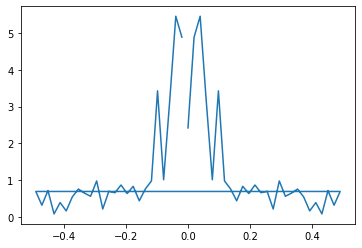

In [ ]:
# Number of samples in normalized_tone
N = 50

yf = fft(gen_bridge(gen_wiener(50)))
xf = fftfreq(N+1, 1)

plt.plot(xf, np.abs(yf))
plt.show()

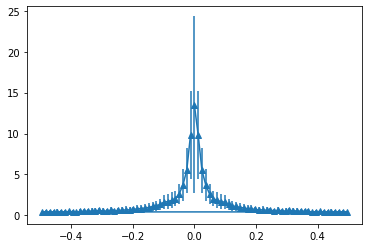

In [ ]:
N = 80
reps = 50
xf = fftfreq(N+1, 1)
trials = np.array([fft(gen_bridge(gen_wiener(N))) for k in range(reps)])
trials = np.abs(trials)
trials_mean = np.mean(trials, axis=0)
trials_sd = np.std(trials, axis=0)
plt.errorbar(xf, trials_mean, trials_sd, marker='^')
plt.show()

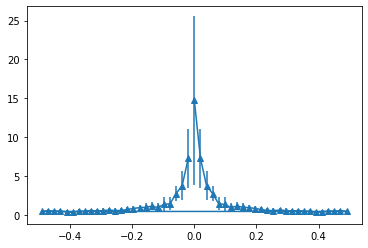

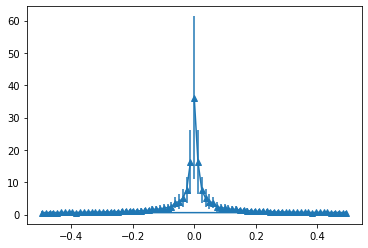

In [ ]:
N = 80
reps = 50
xf = fftfreq(N+1, 1)
trials = np.array([fft(gen_wiener(N)) for k in range(reps)])
trials = np.abs(trials)
trials_mean = np.mean(trials, axis=0)
trials_sd = np.std(trials, axis=0)
plt.errorbar(xf, trials_mean, trials_sd, marker='^')
plt.show()

# Circular brownian

In [ ]:
wein = gen_wiener(100)
w_cos = np.cos(wein*np.pi)
w_sin = np.sin(wein*np.pi)

In [ ]:
w_cos

array([ 1.        ,  0.98672507,  0.9982349 ,  0.69531915,  0.86906356,
        0.92547243,  0.99666318,  0.99284622,  0.99468015,  0.59576921,
        0.98226206,  0.47675734,  0.90754715,  0.85763182,  0.96459747,
        0.7153856 ,  0.91829226,  0.86452642,  0.65203284, -0.27564313,
       -0.25278013])

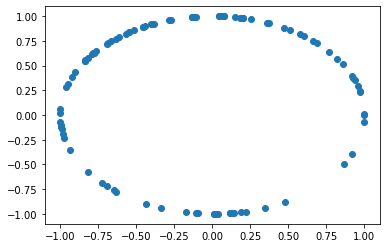

In [ ]:
plt.scatter(w_cos, w_sin)

In [ ]:
from mpl_toolkits import mplot3d

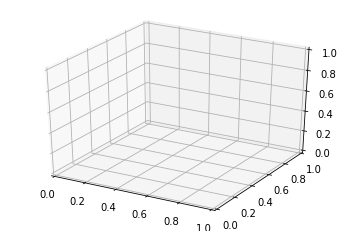

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

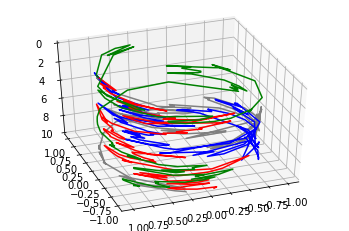

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 10, len(wein))
ax.view_init(-140, 110)
ax.plot3D(w_cos, w_sin, zline, 'gray')
wein = gen_wiener(100)
ax.plot3D(np.cos(wein*np.pi), np.sin(wein*np.pi), zline, 'blue')
wein = gen_wiener(100)
ax.plot3D(np.cos(wein*np.pi), np.sin(wein*np.pi), zline, 'red')
wein = gen_wiener(100)
ax.plot3D(np.cos(wein*np.pi), np.sin(wein*np.pi), zline, 'green')

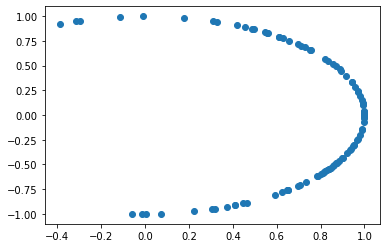

In [ ]:
wein = gen_bridge(gen_wiener(100))
w_cos = np.cos(wein*np.pi)
w_sin = np.sin(wein*np.pi)
plt.scatter(w_cos, w_sin)